Importing libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Importing the dataset

In [44]:
df = pd.read_csv('final_merged.csv')
df.isnull().sum()

Unnamed: 0                0
Date                      0
Symbol                    0
Series_x                  0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Deliverable Volume    10298
%Deliverble           10298
Company Name              0
Industry                  0
dtype: int64

In [45]:
df.head()

,Unnamed: 0,Date,Symbol,Series_x,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,Company Name,Industry
0,0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,1202933.0,0.3028,Bajaj Auto Ltd.,AUTOMOBILE
1,1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,369389.0,0.2110,Bajaj Auto Ltd.,AUTOMOBILE
2,2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,898602.0,0.5438,Bajaj Auto Ltd.,AUTOMOBILE
3,3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,449951.0,0.6723,Bajaj Auto Ltd.,AUTOMOBILE
4,4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,936432.0,0.7420,Bajaj Auto Ltd.,AUTOMOBILE


In [46]:
X = df['Prev Close'].values
y = df['Close'].values

In [47]:
X = X.reshape(-1,1)

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
regression = LinearRegression()
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regression.fit(X_poly,y_train)

LinearRegression()

In [50]:
y_pred = regression.predict(poly_reg.fit_transform(X_test))

In [51]:
r2_score(y_test,y_pred)

0.9989935979176657

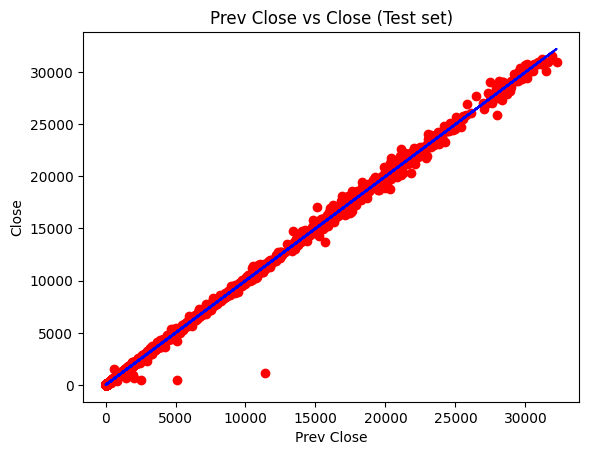

In [52]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regression.predict(poly_reg.fit_transform(X_test)), color = 'blue')
plt.title('Prev Close vs Close (Test set)')
plt.xlabel('Prev Close')
plt.ylabel('Close')
plt.show()